In [25]:
## import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
import keras

## neural network library
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from mlxtend.plotting import plot_confusion_matrix
import pickle
import joblib

In [26]:
data = pd.read_csv('../data/diabetes.csv')
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [29]:
replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[replace_zero] = data[replace_zero].replace(0, np.nan)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


<Axes: >

<Figure size 1000x1000 with 0 Axes>

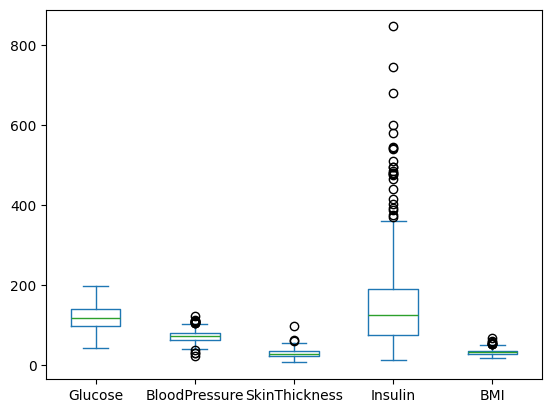

In [30]:
plt.figure(figsize=(10, 10))
boxplot_data = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']]
boxplot_data.plot(kind='box')

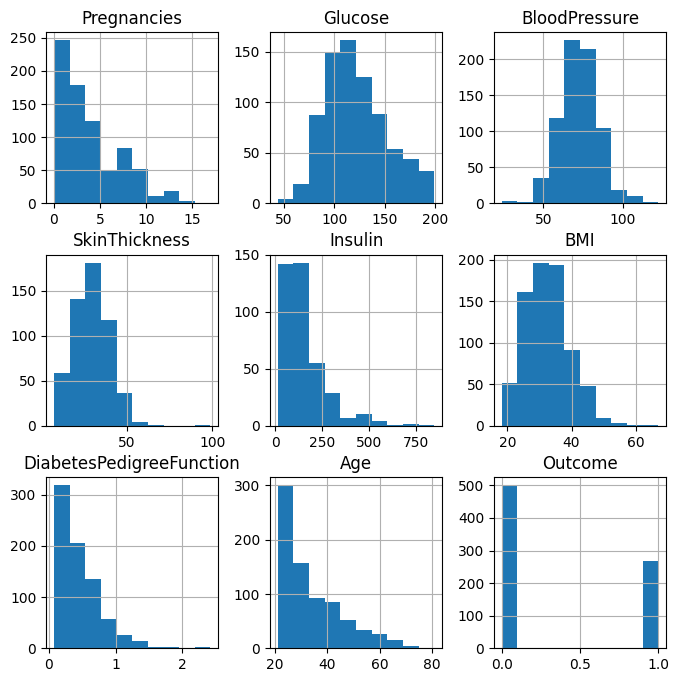

In [31]:
data.hist(bins=10, figsize=(8, 8))
plt.show()

In [32]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [33]:
data['Glucose'] = data['Glucose'].fillna(data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].fillna(data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].fillna(data['SkinThickness'].median())
data['Insulin'] = data['Insulin'].fillna(data['Insulin'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())

In [34]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

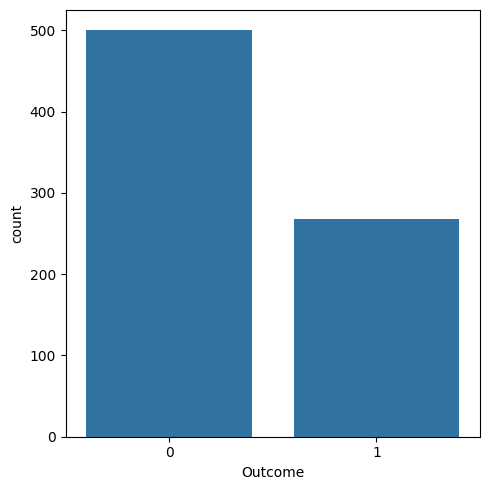

In [36]:
plt.figure(figsize=(5, 5))
sns.countplot(x = 'Outcome', data = data)
plt.tight_layout()

<Axes: >

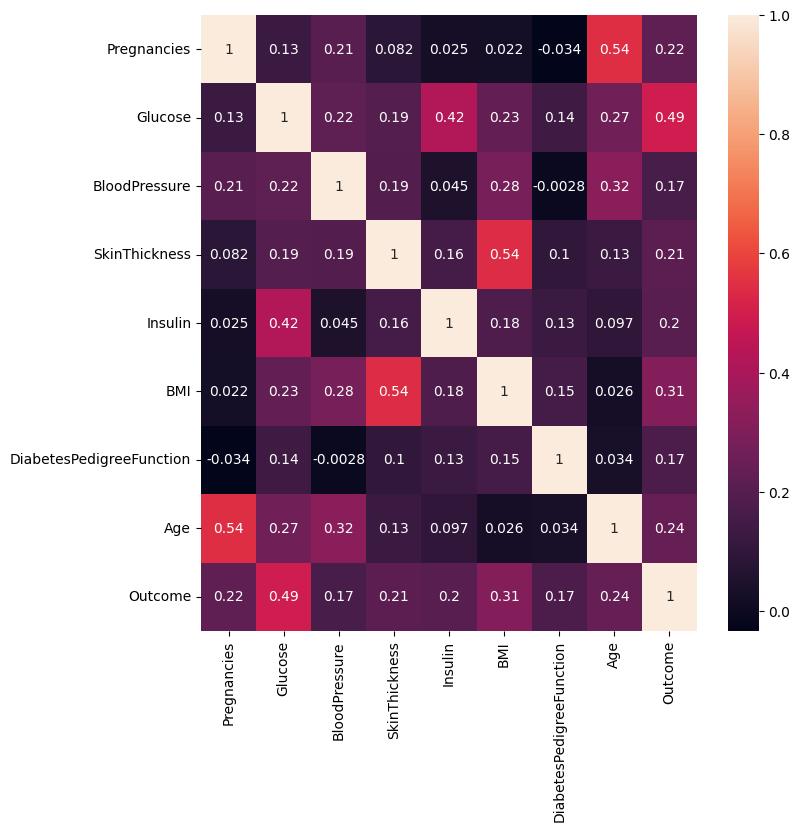

In [37]:
plt.figure(figsize=(8, 8))
corr_mat = data.corr()
sns.heatmap(corr_mat, annot=True)

In [38]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

In [39]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
model = Sequential()

model.add(Input(shape=(X.shape[1],)))
model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=3, kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.01), loss = 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=10, epochs=15, validation_split=0.25)



Epoch 1/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6287 - loss: 0.6663 - val_accuracy: 0.6370 - val_loss: 0.5395
Epoch 2/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.6897 - loss: 0.5141 - val_accuracy: 0.7481 - val_loss: 0.4935
Epoch 3/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.7678 - loss: 0.4463 - val_accuracy: 0.7333 - val_loss: 0.4953
Epoch 4/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.7516 - loss: 0.4746 - val_accuracy: 0.7556 - val_loss: 0.5020
Epoch 5/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - accuracy: 0.7775 - loss: 0.4291 - val_accuracy: 0.7111 - val_loss: 0.4975
Epoch 6/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - accuracy: 0.7454 - loss: 0.4693 - val_accuracy: 0.7333 - val_loss: 0.4967
Epoch 7/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7433 - loss: 0.4895 - val_accuracy: 0.7037 - val_loss: 0.5096
Epoch 8/15
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.7992 - loss: 0.4348 - val_accuracy: 0.7333

In [41]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy is', val_accuracy*100))


val_accuracy is: 72.54%


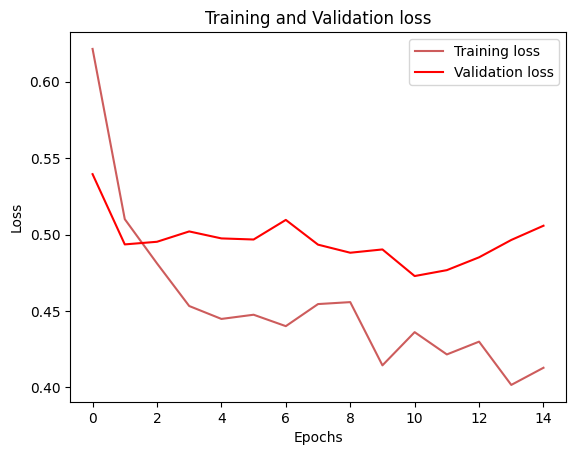

In [42]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#CD5C5C", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#FF0000", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

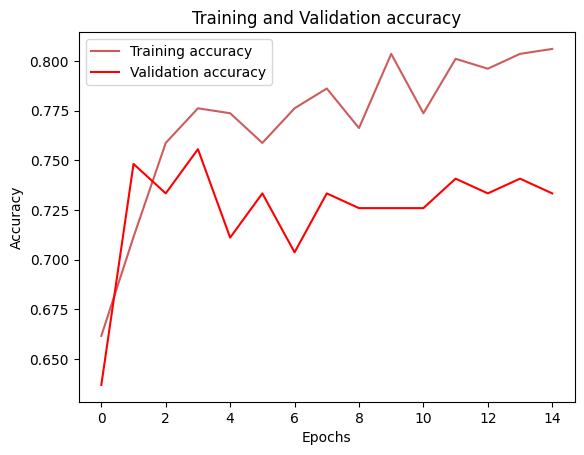

In [43]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#CD5C5C", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#FF0000", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [50]:
y_pred = model.predict(X_test)
# np.mean(y_pred)
threshold = round(268/(500+268), 2)
threshold

y_pred = np.where(y_pred > threshold, 1, 0)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


<Axes: >

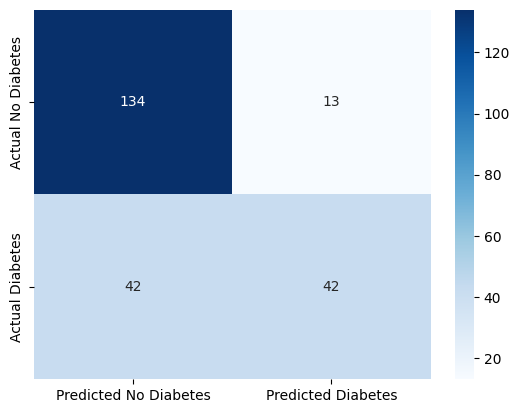

In [49]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.0f',
            xticklabels=['Predicted No Diabetes', 'Predicted Diabetes'],
            yticklabels=['Actual No Diabetes', 'Actual Diabetes'])



In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       147
           1       0.63      0.67      0.65        84

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



In [47]:
keras.saving.save_model(model, '../models/diabetes_model.keras')